In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import arff
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
import time


data=arff.loadarff(open('./artificial/dartboard1.arff','r'))
listX = []
listY=[]
for point in data[0]:
    listX.append(point[0])
    listY.append(point[1])

#transformation en np.array()
X = []
for point in data[0]:
    X.append([point[0],point[1]])
X=np.array(X)



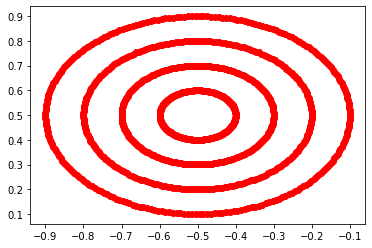

In [3]:
#affichages des datas
plt.plot(listX,listY, 'ro')
plt.show()

score: 0.3425564385683174


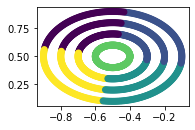

In [4]:
#méthode k-means
kmeans = KMeans(n_clusters=5, random_state=0).fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=kmeans)
print("score:",metrics.silhouette_score(X, kmeans, metric='euclidean'))

métrique: 0.3427806326633162
nombre de cluster: 3
temps: 0.3383920192718506


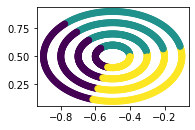

In [8]:
#variation des paramètres et calculs du score sur kMeans
find = False
nb_cluster = 2
metric_best = 0
limit=20
iteration = 0
start=time.time()
#on s'arrête quand notre score n'est plus améliorée
while(not find & (iteration < limit)):
    kmeans = KMeans(n_clusters=nb_cluster, random_state=0).fit_predict(X)
    find_metric = metrics.silhouette_score(X, kmeans, metric='euclidean')
    if find_metric > metric_best:
        metric_best=find_metric
        nb_cluster+=1
        best_kmeans = kmeans
    else:
        find=True
    iteration+=1
end=time.time()   
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=best_kmeans)
print("métrique:",metric_best)
print("nombre de cluster:",nb_cluster-1)
print("temps:", end-start)

score: 0.2833771244426711


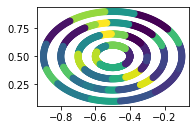

In [17]:
#méthode agglomerate-clustering
clustering = AgglomerativeClustering(n_clusters=20,linkage='complete').fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=clustering)
print("score:",metrics.silhouette_score(X, clustering, metric='euclidean'))

métrique: 0.23745156051492405
nombre de cluster: 2
temps: 0.13761353492736816


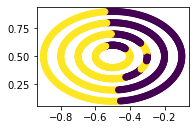

In [18]:
#variation des paramètres et calculs du score sur clustering-agglomerate
find = False
nb_cluster = 2 #on commence à deux clusters ou le calcul du score ne fonctionne pas
metric_best = -1
start=time.time()

#on s'arrête quand notre score n'est plus améliorée
while(not find):
    clustering = AgglomerativeClustering(n_clusters=nb_cluster,linkage='complete').fit_predict(X)
    find_metric = metrics.silhouette_score(X, clustering, metric='euclidean')
    if find_metric > metric_best:
        metric_best=find_metric
        nb_cluster+=1
        best_clustering = clustering
    else:
        find=True
    iteration+=1
end=time.time()

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=best_clustering)
print("métrique:",metric_best)
print("nombre de cluster:",nb_cluster-1)
print("temps:", end-start)


score: -0.042578419131562954


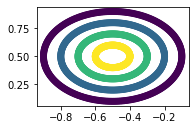

In [16]:
#méthode DBSCAN
clustering = DBSCAN(eps=0.05, min_samples=4).fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=clustering)
print("score:",metrics.silhouette_score(X, clustering, metric='euclidean'))

métrique: -0.042578419131562954
nombre de cluster: 2
temps: 0.11573028564453125


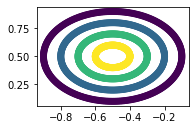

In [25]:
#variation des paramètres et calculs du score sur DBSCAN
find_eps = False
metric_best = -1
eps_max = 0.06

start=time.time()
#on s'arrête quand notre score n'est plus améliorée
while(not find_eps and (eps_max>0.0)):
    clustering = DBSCAN(eps=eps_max, min_samples=4).fit(X)
    n_clusters = len(set(clustering.labels_))
    #check du nombre de cluster pour le calcu
    if(n_clusters !=1):
        clustering_to_plot = DBSCAN(eps=eps_max, min_samples=4).fit_predict(X)
        find_metric = metrics.silhouette_score(X, clustering_to_plot, metric='euclidean')
        if find_metric > metric_best:
            metric_best=find_metric
            best_clustering = clustering_to_plot
            eps_max = eps_max-0.01
        else:
            find_eps=True
    else:
        eps_max=eps_max-0.01

end=time.time()

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=best_clustering)
print("métrique:",metric_best)
print("nombre de cluster:",nb_cluster-1)
print("temps:", end-start)
